# **Crop Recommendation & Yield Prediction**

### IMPORT LIBRARIES

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install catboost

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


In [5]:
# Scikit-learn algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Boosting algorithms
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

### Load Dataset

In [7]:
df = pd.read_csv("/content/Crop_recommendation.csv")
df

N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

## **Exploratory Data Analysis (EDA)**

### 1. Basic Overview

In [8]:
# View first rows
df.head(15)

N   P   K  temperature   humidity        ph    rainfall label
0   90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1   85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2   60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3   74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4   78  42  42    20.130175  81.604873  7.628473  262.717340  rice
5   69  37  42    23.058049  83.370118  7.073454  251.055000  rice
6   69  55  38    22.708838  82.639414  5.700806  271.324860  rice
7   94  53  40    20.277744  82.894086  5.718627  241.974195  rice
8   89  54  38    24.515881  83.535216  6.685346  230.446236  rice
9   68  58  38    23.223974  83.033227  6.336254  221.209196  rice
10  91  53  40    26.527235  81.417538  5.386168  264.614870  rice
11  90  46  42    23.978982  81.450616  7.502834  250.083234  rice
12  78  58  44    26.800796  80.886848  5.108682  284.436457  rice
13  93  56  36    24.014976  82.056872  6.984354  185.277339  rice
14  94  50  37    25.665852  80.663850  6.948020  209.586971  rice

In [9]:
# Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
# Statistical summary
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

### 2. Check for missing values


In [11]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

### 3. Feature distribution

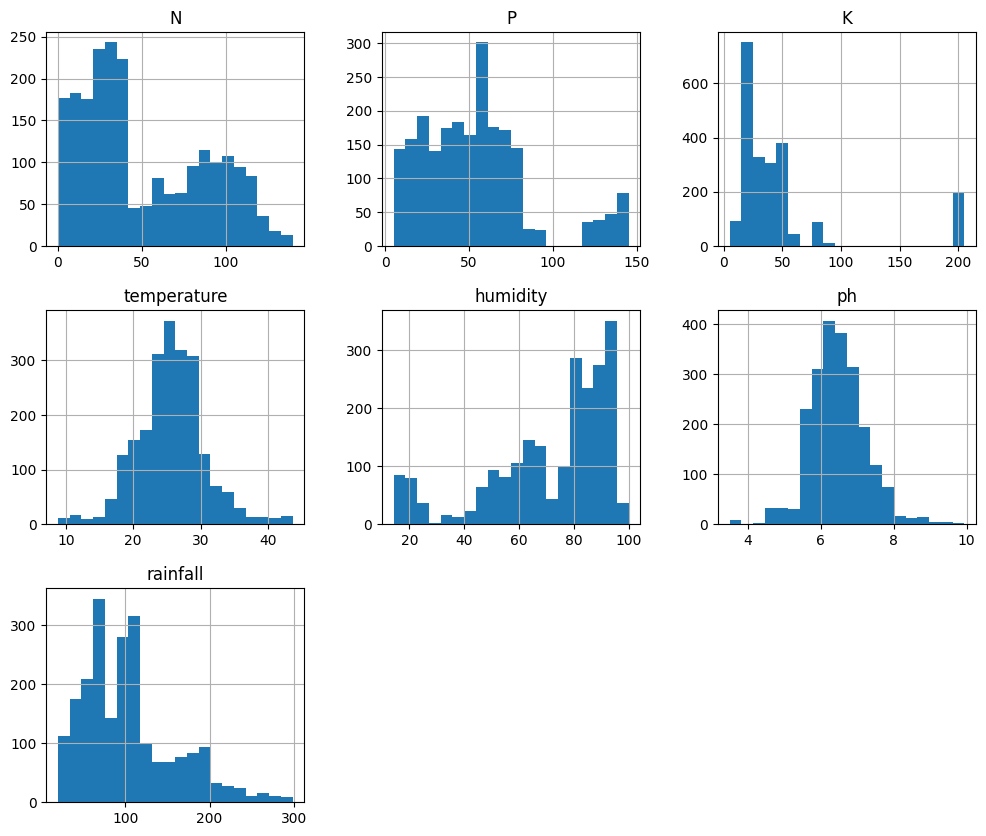

In [12]:
# Histograms for all features
df.hist(figsize=(12,10), bins=20)
plt.show()


### 4. Detect Outliers / Anomalies

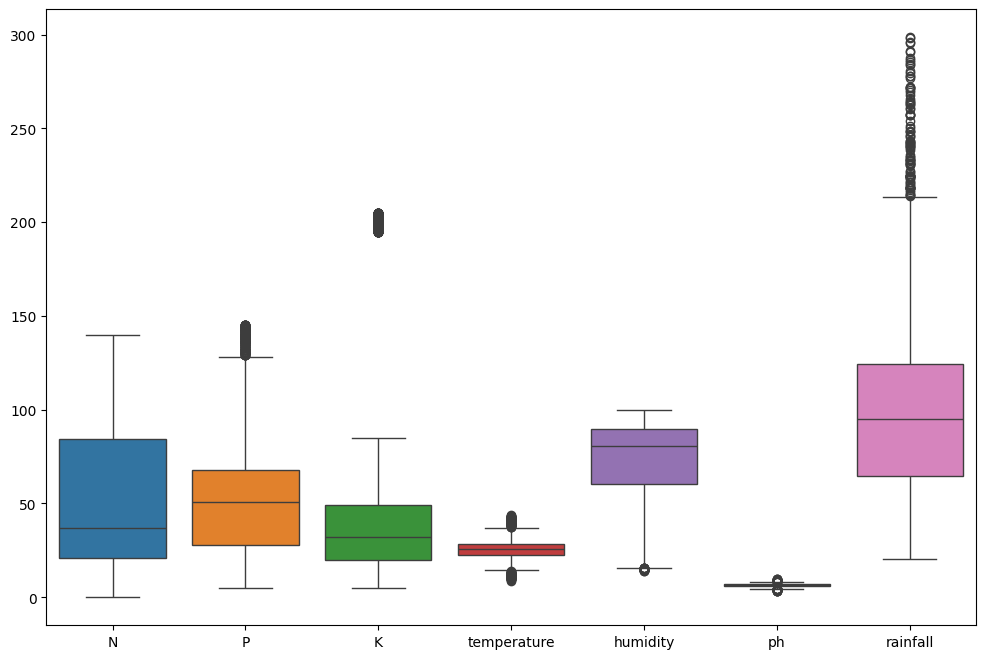

In [13]:
# Boxplot for all features
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.show()


### 5. Target Variable Analysis

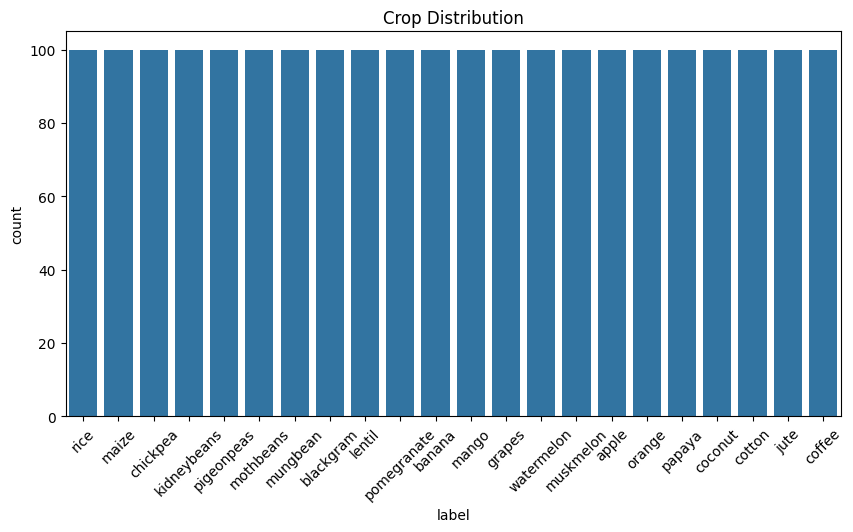

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x='label', data=df)
plt.title("Crop Distribution")
plt.xticks(rotation=45)
plt.show()


## **Preprocessing**

### 1. Encode Target Labels

In [15]:
crop_names = [
    'rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
    'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango',
    'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya',
    'coconut', 'cotton', 'jute', 'coffee'
]

le = LabelEncoder()
le.fit(crop_names)

LabelEncoder()

### 2. Split Features & Target

In [16]:
y = le.transform(df['label'])
X = df.drop('label', axis=1)

### 3. Train-Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 4. Feature Scaling (for SVM & KNN)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **1. Random Forest**

In [19]:
# random forest training
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [20]:
# Prediction
y_pred_rf = rf.predict(X_test_scaled)

In [21]:
print("‚úÖ Accuracy:", round(accuracy_score(y_test, y_pred_rf)*100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

‚úÖ Accuracy: 99.24 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        23
           8       0.87      1.00      0.93        34
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        22
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        34
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        24
          16       1.00      1.00 

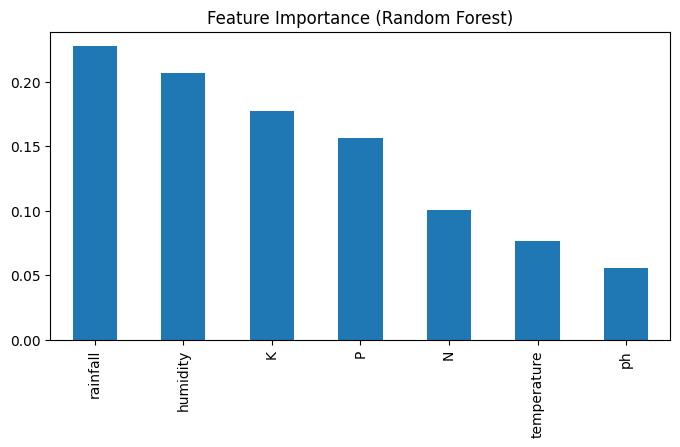

In [22]:
# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(8,4), title='Feature Importance (Random Forest)')
plt.show()

In [23]:
# Define realistic ranges
feature_ranges = {
    'N': (0, 140),
    'P': (0, 140),
    'K': (0, 140),
    'temperature': (10, 45),
    'humidity': (20, 100),
    'ph': (3.5, 9.0),
    'rainfall': (20, 300)
}

# Generate one scenario
random_input = {f: np.random.uniform(low, high) if isinstance(low, float) or isinstance(high, float)
                else np.random.randint(low, high+1)
                for f, (low, high) in feature_ranges.items()}

new_data = pd.DataFrame([random_input], columns=X.columns)
new_data_scaled = scaler.transform(new_data)

# Predict numeric label
prediction = rf.predict(new_data_scaled)

# Convert to crop name
predicted_crop = le.inverse_transform(prediction)

print("\nRandom Soil & Climate Scenario:")
print(new_data.round(2))
print("\nüåæ Recommended Crop:", predicted_crop[0])















Random Soil & Climate Scenario:
    N   P   K  temperature  humidity   ph  rainfall
0  65  59  30           18        92  4.5       270

üåæ Recommended Crop: rice


# **2. Cat Boost Algorithm**

In [24]:
# Initialize CatBoost
cat = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, random_seed=42, verbose=0)

# Train
cat.fit(X_train_scaled, y_train)


In [25]:
# Prediction and Evaluate
# Predict on test set
y_pred_cat = cat.predict(X_test_scaled)

# Accuracy & Classification Report
print("‚úÖ CatBoost Accuracy:", round(accuracy_score(y_test, y_pred_cat)*100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_cat))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_cat))


‚úÖ CatBoost Accuracy: 98.48 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26
           2       0.93      1.00      0.96        26
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        23
           8       0.85      1.00      0.92        34
           9       0.97      1.00      0.99        36
          10       0.96      1.00      0.98        22
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        32
          13       1.00      0.97      0.99        34
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        24
          16       1.00  

In [26]:
# Generate random sample
random_input = {feature: np.random.randint(low, high)
                for feature, (low, high) in feature_ranges.items()}

# Convert to DataFrame
new_data = pd.DataFrame([random_input])

# Scale
new_data_scaled = scaler.transform(new_data)

# Predict with CatBoost
prediction_cat = cat.predict(new_data_scaled)
predicted_crop_cat = le.inverse_transform(prediction_cat)

print("Random Soil & Climate Scenario:")
print(new_data)
print("\nüåæ CatBoost Recommended Crop:", predicted_crop_cat[0])


Random Soil & Climate Scenario:
     N    P    K  temperature  humidity  ph  rainfall
0  123  121  131           43        85   8       261

üåæ CatBoost Recommended Crop: papaya


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# **3. XGBoost Algorithm**

In [27]:
# Initialize XGBoost
xgb = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=6, random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Train
xgb.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:42:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [28]:
# Predict on test set
y_pred_xgb = xgb.predict(X_test_scaled)

# Accuracy & Report
print("‚úÖ XGBoost Accuracy:", round(accuracy_score(y_test, y_pred_xgb)*100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


‚úÖ XGBoost Accuracy: 98.18 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.96      1.00      0.98        26
           2       0.96      1.00      0.98        26
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        30
           6       0.97      1.00      0.98        28
           7       1.00      1.00      1.00        23
           8       0.85      1.00      0.92        34
           9       1.00      1.00      1.00        36
          10       1.00      0.95      0.98        22
          11       0.96      0.96      0.96        26
          12       0.97      1.00      0.98        32
          13       0.97      1.00      0.99        34
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        24
          16       1.00   

In [29]:
# Predict on previously generated random scenario
random_input = {feature: np.random.randint(low, high)
                for feature, (low, high) in feature_ranges.items()}

# Convert to DataFrame
new_data = pd.DataFrame([random_input])

# Scale
new_data_scaled = scaler.transform(new_data)
prediction_xgb = xgb.predict(new_data_scaled)
predicted_crop_xgb = le.inverse_transform(prediction_xgb)

print("Random Soil & Climate Scenario:")
print(new_data)
print("\nüåæ XGBoost Recommended Crop:", predicted_crop_xgb[0])


Random Soil & Climate Scenario:
    N   P    K  temperature  humidity  ph  rainfall
0  82  34  114           32        91   6       228

üåæ XGBoost Recommended Crop: papaya


#**4. SVM (Support Vector Machine)**

In [30]:
# Train SVM
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(C=1, random_state=42)

In [31]:
# Evaluate SVM
y_pred = svm_model.predict(X_test_scaled)

In [32]:
print("‚úÖ SVM Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

‚úÖ SVM Accuracy: 97.27 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26
           2       0.93      0.96      0.94        26
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        30
           6       0.97      1.00      0.98        28
           7       1.00      1.00      1.00        23
           8       0.79      1.00      0.88        34
           9       0.95      1.00      0.97        36
          10       0.85      1.00      0.92        22
          11       1.00      0.96      0.98        26
          12       1.00      1.00      1.00        32
          13       1.00      0.91      0.95        34
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        24
          16       1.00      1

In [33]:
random_input = {feature: np.random.uniform(low, high) if isinstance(low, float) or isinstance(high, float)
                else np.random.randint(low, high+1)
                for feature, (low, high) in feature_ranges.items()}

# Convert to DataFrame
new_data = pd.DataFrame([random_input], columns=X.columns)

# Scale features
new_data_scaled = scaler.transform(new_data)

# Predict numeric label using SVM
prediction = svm_model.predict(new_data_scaled)

# Convert numeric label to crop name
predicted_crop = le.inverse_transform(prediction)

# Output
print("\nRandom Soil & Climate Scenario:")
print(new_data.round(2))

print("\nüåæ Recommended Crop:", predicted_crop[0])


Random Soil & Climate Scenario:
     N   P  K  temperature  humidity    ph  rainfall
0  135  18  2           29        56  8.19       115

üåæ Recommended Crop: coffee


# **5. K-Nearest Neighbors (KNN)**

In [34]:
# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=5)

In [35]:
# Train KNN
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [36]:
# Predict on test set
y_pred_knn = knn.predict(X_test_scaled)

In [37]:
# Accuracy and report
print("‚úÖ KNN Accuracy:", round(accuracy_score(y_test, y_pred_knn)*100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

‚úÖ KNN Accuracy: 96.06 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26
           2       0.89      0.96      0.93        26
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       0.97      0.97      0.97        30
           6       0.97      1.00      0.98        28
           7       1.00      1.00      1.00        23
           8       0.79      0.97      0.87        34
           9       0.95      1.00      0.97        36
          10       0.81      1.00      0.90        22
          11       1.00      0.96      0.98        26
          12       0.91      1.00      0.96        32
          13       1.00      0.85      0.92        34
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        24
          16       1.00      0

In [38]:
random_input = {feature: np.random.uniform(low, high) if isinstance(low, float) or isinstance(high, float)
                else np.random.randint(low, high+1)
                for feature, (low, high) in feature_ranges.items()}

new_data = pd.DataFrame([random_input], columns=X.columns)
new_data_scaled = scaler.transform(new_data)

# Predict numeric label
prediction = knn.predict(new_data_scaled)

# Convert numeric label to crop name
predicted_crop = le.inverse_transform(prediction)

# Output
print("\nRandom Soil & Climate Scenario:")
print(new_data.round(2))
print("\nüåæ KNN Recommended Crop:", predicted_crop[0])


Random Soil & Climate Scenario:
     N    P    K  temperature  humidity   ph  rainfall
0  132  127  134           27        46  5.0       174

üåæ KNN Recommended Crop: banana


In [39]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Suppose this is your chosen soil & climate scenario
new_data = pd.DataFrame([{
    'N': 90,
    'P': 42,
    'K': 43,
    'temperature': 20.8,
    'humidity': 82.0,
    'ph': 6.5,
    'rainfall': 202.9
}], columns=X.columns)

# Scale features
new_data_scaled = scaler.transform(new_data)

# ---- Random Forest ----
rf_prediction = rf.predict(new_data_scaled)
rf_crop = le.inverse_transform(rf_prediction)
rf_accuracy = round(accuracy_score(y_test, y_pred_rf)*100, 2)

# ---- SVM ----
svm_prediction = svm_model.predict(new_data_scaled)
svm_crop = le.inverse_transform(svm_prediction)
svm_accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

# ---- CatBoost ----
cat_prediction = cat.predict(new_data_scaled)
cat_crop = le.inverse_transform(cat_prediction)
cat_accuracy = round(accuracy_score(y_test, y_pred_cat)*100, 2)

# ---- XGBoost ----
xgb_prediction = xgb.predict(new_data_scaled)
xgb_crop = le.inverse_transform(xgb_prediction)
xgb_accuracy = round(accuracy_score(y_test, y_pred_xgb)*100, 2)

# ---- KNN ----
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_prediction = knn_model.predict(new_data_scaled)
knn_crop = le.inverse_transform(knn_prediction)
y_pred_knn = knn_model.predict(X_test_scaled)
knn_accuracy = round(accuracy_score(y_test, y_pred_knn)*100, 2)

# Prepare results table
results = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'CatBoost', 'XGBoost', 'KNN'],
    'Predicted Crop': [rf_crop[0], svm_crop[0], cat_crop[0], xgb_crop[0], knn_crop[0]],
    'Accuracy (%)': [rf_accuracy, svm_accuracy, cat_accuracy, xgb_accuracy, knn_accuracy]
})

print("\nSoil & Climate Scenario:")
print(new_data.round(2))

print("\nüåæ Predictions & Accuracies:")
print(results)



Soil & Climate Scenario:
    N   P   K  temperature  humidity   ph  rainfall
0  90  42  43         20.8      82.0  6.5     202.9

üåæ Predictions & Accuracies:
           Model Predicted Crop  Accuracy (%)
0  Random Forest           rice         99.24
1            SVM           rice         97.27
2       CatBoost           rice         98.48
3        XGBoost           rice         98.18
4            KNN           rice         96.06


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
